In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
DATA_PATH = 'C:\\Users\\01yt0\\Desktop\\yfianwu\\'

In [7]:
#Loading dataset
train_txn = pd.read_csv(DATA_PATH+ 'train_transaction.csv')
train_idn = pd.read_csv(DATA_PATH+ 'train_identity.csv')

Reduce memory of datasets

In [8]:
#MEMORY BEFORE ANY CHANGES
mem_use = train_txn.memory_usage().sum() / 1024**3 
print('Memory usage of train_transc is {:.6f} GB'.format(mem_use))
mem_use = train_idn.memory_usage().sum() / 1024**2 
print('Memory usage of train_idn is {:.6f} MB'.format(mem_use))

Memory usage of train_transc is 1.733547 GB
Memory usage of train_idn is 45.116951 MB


In [9]:
#Float range
f64_max = 1.7976931348623157e+308
f64_min =  -1.7976931348623157e+308

f32_max = 3.4028235e+38
f32_min = -3.4028235e+38

f16_max = 65500.0
f16_min = -65500.0

#Integer range
i64_max = 9223372036854775807
i64_min =  -9223372036854775808

i32_max =  2147483647
i32_min = -2147483648

i16_max = 32767
i16_min = -32768

In [12]:
def reduce_memory(train):
    for m in train.columns:
        #When it is an integer:
        if str(train[m].dtype) == 'int64':
            #Min & Max value of all columns with integer datatype
            train[m].max()
            train[m].min()
            if train[m].max() < i16_max and train[m].min() > i16_min :
                #convert column into int16
                train[m] = train[m].astype(np.int16)
            else:
                if train[m].max() < i32_max and train[m].min() > i32_min :
                    #convert column into int32
                    train[m] = train[m].astype(np.int32)
                else:
                    if train[m].max() < i64_max and train[m].min() > i64_min :
                        #convert column into int64
                        train[m] = train[m].astype(np.int64)
        
    for m in train.columns:
        #When it is a float:
        if str(train[m].dtype) == 'float64':
            #Min & Max value of all columns with float datatype
            train[m].max()
            train[m].min()
            if train[m].max() < f16_max and train[m].min() > f16_min :
                #convert column into float16
                train[m] = train[m].astype(np.float16)
            else:
                if train[m].max() < f32_max and train[m].min() > f32_min :
                    #convert column into float32
                    train[m] = train[m].astype(np.float32)
                else:
                    if train[m].max() < f64_max and train[m].min() > f64_min :
                        #convert column into float64
                        train[m] = train[m].astype(np.float64)

In [14]:
reduce_memory(train_txn)
reduce_memory(train_idn)

In [15]:
#MEMORY BEFORE ANY CHANGES
mem_use = train_txn.memory_usage().sum() / 1024**3 
print('Memory usage of train_transc is {:.6f} GB'.format(mem_use))
mem_use = train_idn.memory_usage().sum() / 1024**2 
print('Memory usage of train_idn is {:.6f} MB'.format(mem_use))

Memory usage of train_transc is 0.530184 GB
Memory usage of train_idn is 25.859768 MB


Handle anonyous Features

In [17]:
def get_nan_dic(df):
    """
    get NaN dictionary
    return: a dictionary with #of null values as key and feature names as value
    """
    nulls = df.isna()
    nan_dic = {}
    for f in df.columns:
        c=nulls[f].sum()
        nan_dic[c]=[]
    for f in df.columns:
        c = nulls[f].sum()
        nan_dic[c].append(f)
    return nan_dic

In [18]:
#creating the dictonary for 'train_txn' dataset to check the NAN values columns
nan_dic = get_nan_dic(train_txn)

In [178]:
#check the features that has the same NAN values
ig = nan_dic[12]
ig

['V279',
 'V280',
 'V284',
 'V285',
 'V286',
 'V287',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V297',
 'V298',
 'V299',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321']

In [183]:
def corr_plo(col,df):
    fig = plt.figure(figsize=(12,8))
    sns.heatmap(df[col].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show()

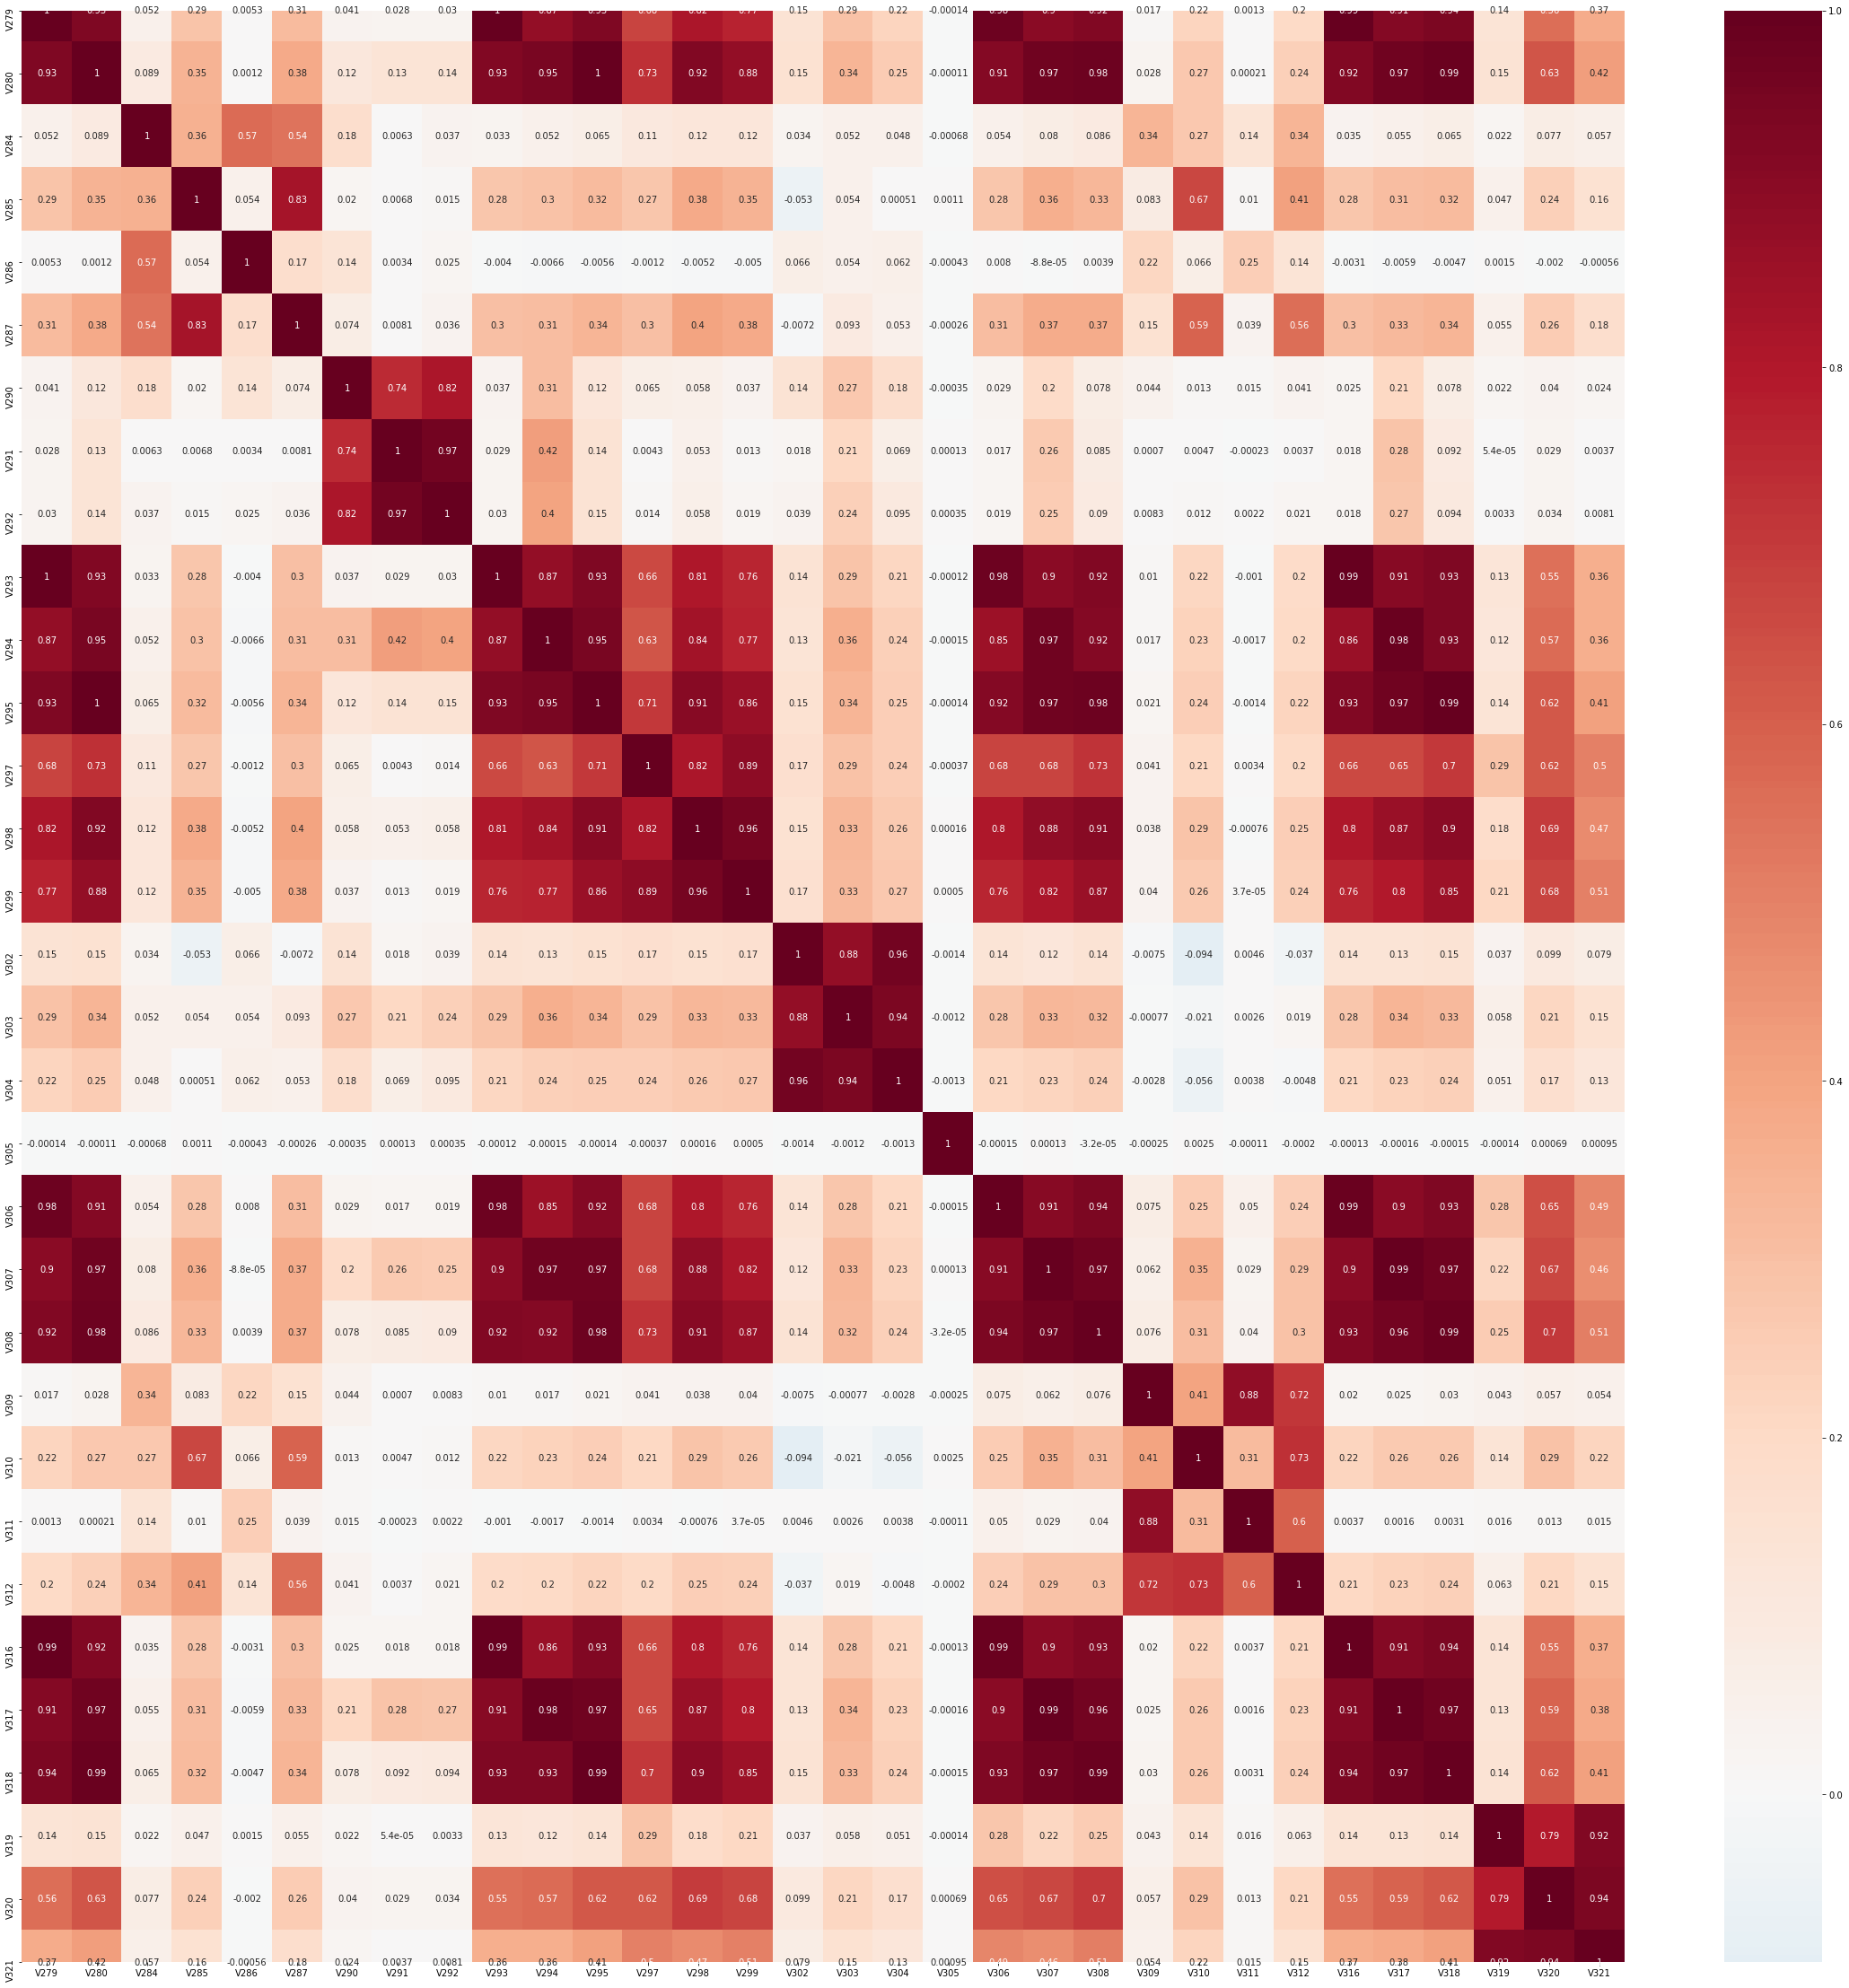

In [181]:
corr_plo(ig,train_txn)

In [ ]:
#For 12 High corr columns need to drop 
cp_list14 = ['291','V292','V294','V295','isFraud','V298','V299','V307','V308','V317','V318']

In [29]:
#create a list that compare High corr columns with target #For 508189 High corr columns need to drop 
cp_list1 = ['V323','V324','V326','isFraud','V329','V330','V332','V333','V327']

In [44]:
#find the least corr with target by ploting it 
corr_plo(cp_list1,train_txn) #Since i drop the least corr below. it will get index error

KeyError: "['V329', 'V326', 'V324', 'V333'] not in index"

<Figure size 864x576 with 0 Axes>

In [77]:
#For 1269 High corr columns need to drop 
cp_list2 = ['V300', 'isFraud', 'V301']

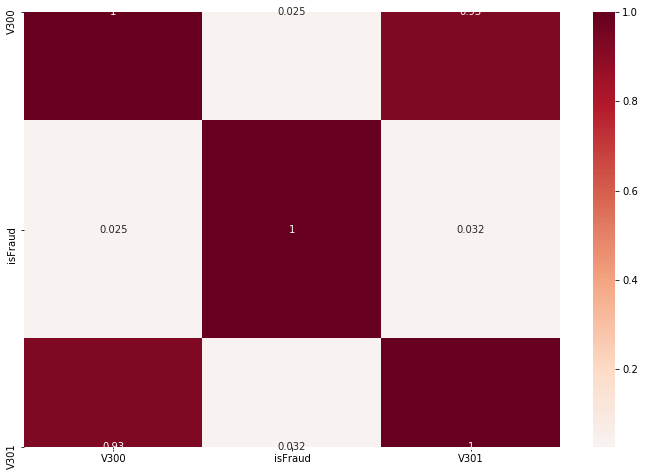

In [78]:
corr_plo(cp_list2,train_txn)

In [79]:
#For 279287 High corr columns need to drop 
cp_list3 = ['V10','isFraud','V11']

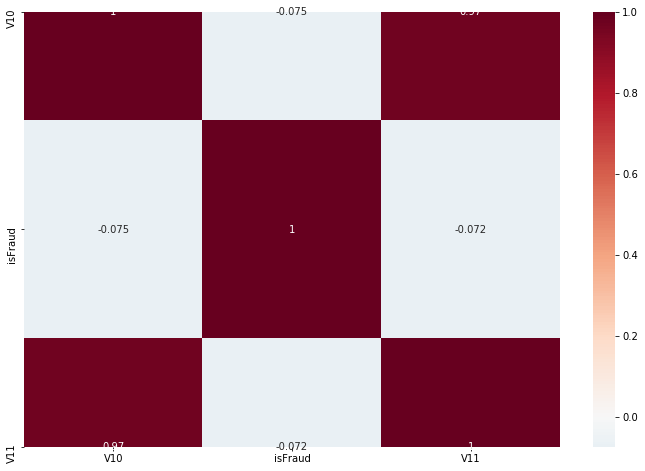

In [80]:
corr_plo(cp_list3,train_txn)

In [101]:
#For 76073 High corr columns need to drop 
cp_list4 = ['V15','V16','V17','V18','isFraud','V21','V22','V27','V28','V29','V30','V31','V32','V33','V34']

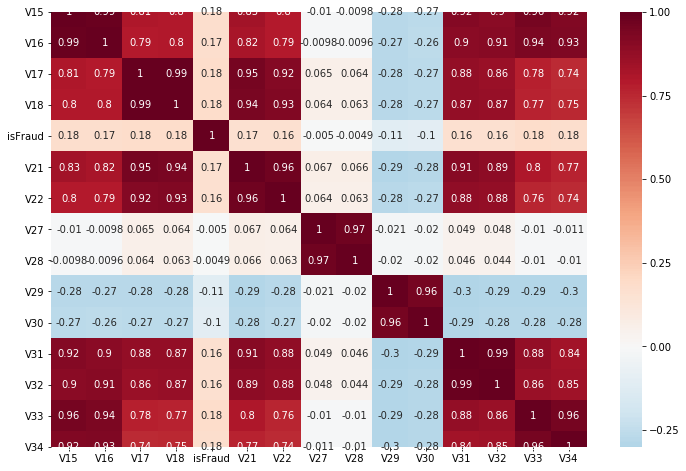

In [102]:
corr_plo(cp_list4,train_txn)

In [107]:
#For 168969 High corr columns need to drop 
cp_list5 = ['V35','V36','V39','V40','isFraud','V42','V43','V48','V49','V51','V52']

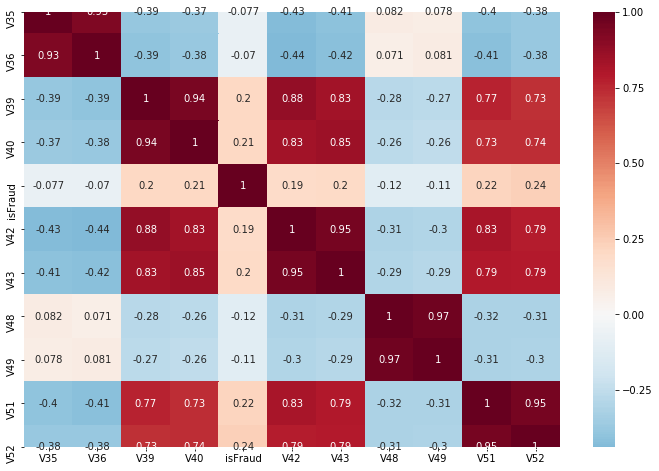

In [108]:
corr_plo(cp_list5,train_txn)

In [114]:
#For 77096 High corr columns need to drop 
cp_list6 = ['V57','V58','V59','V60','isFraud','V63','V64','V69','V70','V71','V72','V73','V74']

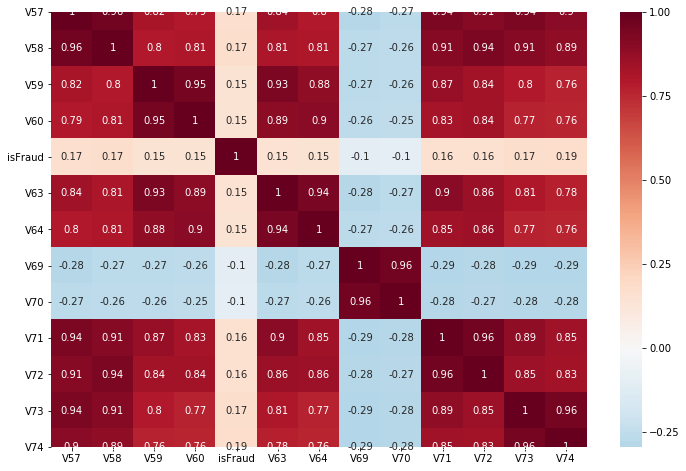

In [115]:
corr_plo(cp_list6,train_txn)

In [118]:
#For 89164 High corr columns need to drop 
cp_list7 = ['V80','V81','V84','V85','isFraud','V90','V91','V92','V93']

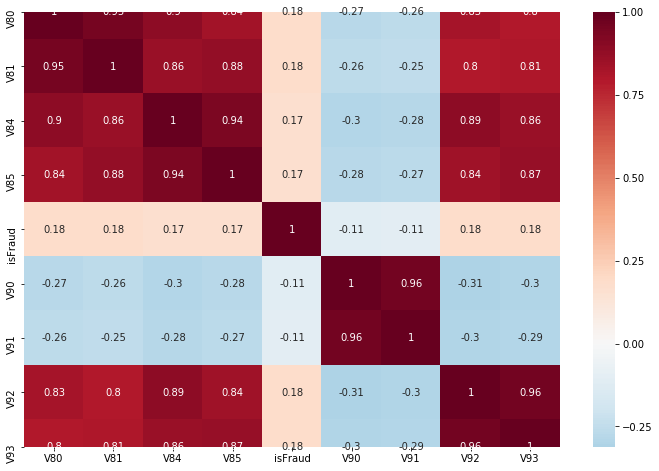

In [119]:
corr_plo(cp_list7,train_txn)

In [132]:
#For 314 High corr columns need to drop 
cp_list8 = ['V96','V97','V103','V102','isFraud','V105','V106','V127','V128']

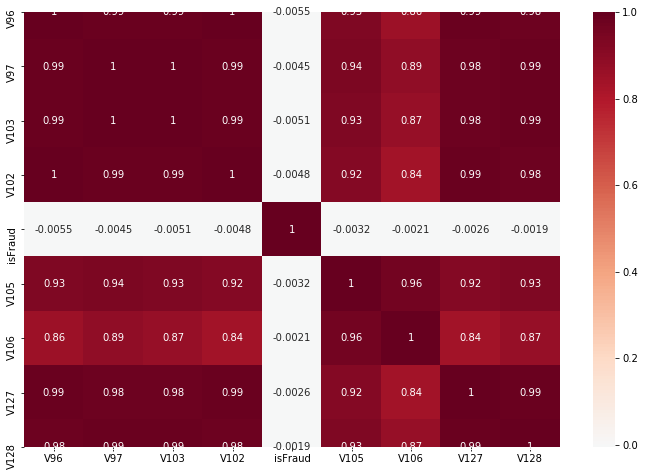

In [133]:
corr_plo(cp_list8,train_txn)

In [140]:
#For 508595 High corr columns need to drop 
cp_list9 = ['V139','V140','V148','V149','isFraud','V153','V154','V155','V156']

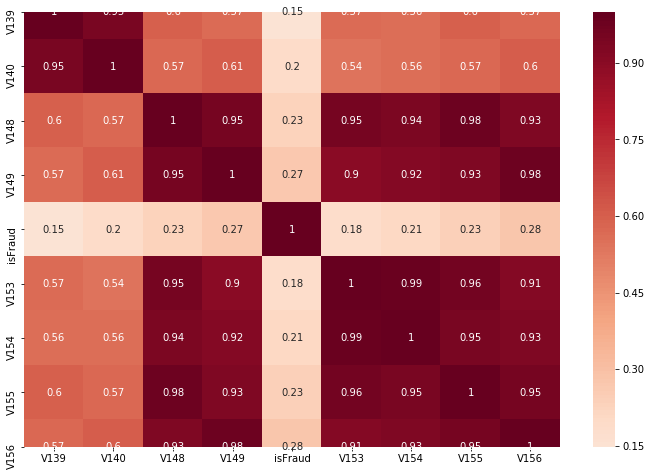

In [141]:
corr_plo(cp_list9,train_txn)

In [145]:
#For 508589 High corr columns need to drop 
cp_list10 = ['V145','V150','V151','V144','isFraud','V152']

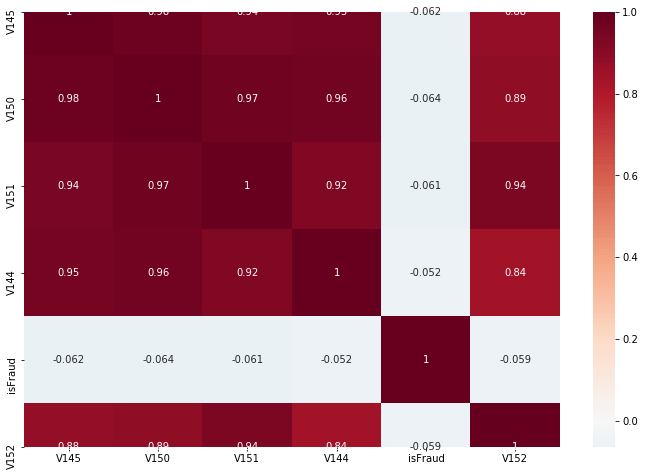

In [146]:
corr_plo(cp_list10,train_txn)

In [156]:
#For 450909 High corr columns need to drop 
cp_list11 = ['V178','V179','V182','V183','isFraud','V192','V193','V203','V204','V212','V213']

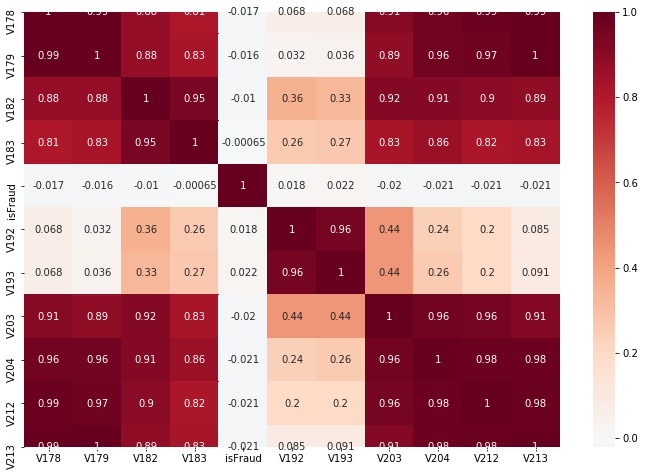

In [157]:
corr_plo(cp_list11,train_txn)

In [172]:
#For 460110 High corr columns need to drop 
cp_list12 = ['V218','V219','V224','V225','isFraud','V232','V233','V236','V248','V249','V253']

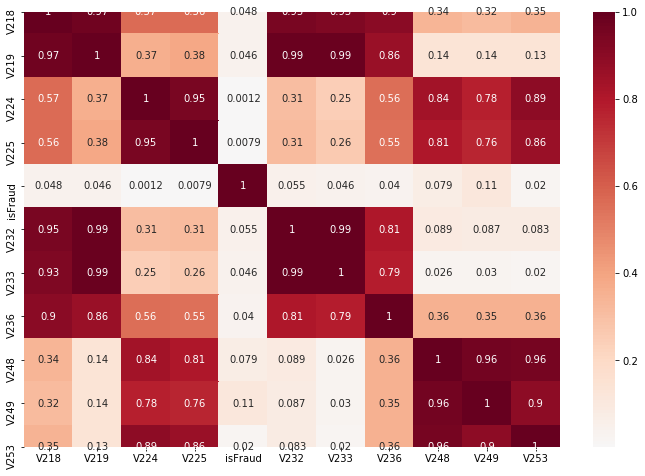

In [173]:
corr_plo(cp_list12,train_txn)

In [176]:
#For 449124 High corr columns need to drop 
cp_list13 = ['V221','V222','V238','V239','isFraud','V250','V251','V255','V256','V271','V272']

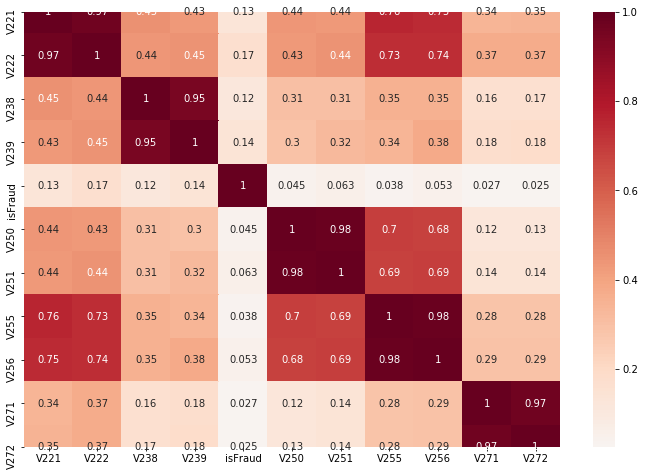

In [177]:
corr_plo(cp_list13,train_txn)

In [185]:
#For 12 High corr columns need to drop 
cp_list14 = ['V292','V294','V295','isFraud','V298','V299','V307','V308','V317','V318']

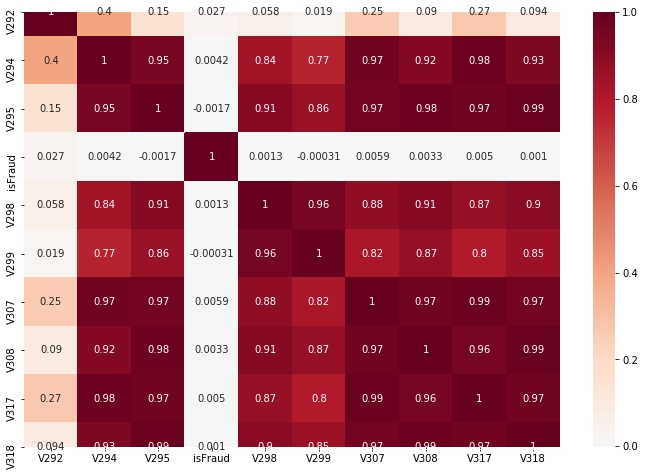

In [186]:
corr_plo(cp_list14,train_txn)

In [187]:
#drop the least corr
train_txn.drop(['V324','V326','V329','V333','V300','V10','V16','V17','V22','V27','V29','V31','V33','V35','V39','V42','V48','V51','V57','V59','V63','V69','V71','V73','V80','V84','V90','V92','V96','V103','V105','V127','V139','148','V153','V155','V150','V178','V182','V192','V204','V212','219','V224','233','248','221','238','250','255','272','V295','V299','V308','318'],axis=1,inplace=True)
#Since i drop the least corr . it will get index error
#ALL the columns need to be drop in transcation_train dataset after mannuly selection.

KeyError: "['V324' 'V326' 'V329' 'V333' '148' '219' '233' '248' '221' '238' '250'\n '255' '272' '318'] not found in axis"

Things below are still working on it 

In [14]:
# get info of missing data for each col by creading data frame that contains col's name and its NaN value counts
nan_info = pd.DataFrame(train_txn.isnull().sum()).reset_index()
nan_info.columns = ['col','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info

,col,nan_cnt
14,dist2,552913
37,D7,551623
43,D13,528588
44,D14,528353
42,D12,525823
...,...,...
24,C8,0
23,C7,0
22,C6,0
21,C5,0


In [16]:
# get all cols with missing data
cols_with_missing = nan_info.loc[nan_info.nan_cnt>0].col.values
cols_with_missing

array(['dist2', 'D7', 'D13', 'D14', 'D12', 'D6', 'D9', 'D8', 'V153',
       'V139', 'V162', 'V161', 'V154', 'V138', 'V158', 'V157', 'V163',
       'V156', 'V155', 'V149', 'V148', 'V147', 'V146', 'V142', 'V141',
       'V140', 'V151', 'V152', 'V145', 'V144', 'V150', 'V143', 'V160',
       'V166', 'V164', 'V159', 'V165', 'V322', 'V332', 'V338', 'V337',
       'V336', 'V335', 'V334', 'V333', 'V331', 'V323', 'V330', 'V328',
       'V327', 'V326', 'V325', 'V324', 'V329', 'V339', 'V258', 'V269',
       'V243', 'V242', 'V241', 'V240', 'V237', 'V236', 'V235', 'V233',
       'V232', 'V231', 'V276', 'V230', 'V229', 'V228', 'V226', 'V225',
       'V224', 'V244', 'V246', 'V247', 'V275', 'V274', 'V268', 'V267',
       'V266', 'V265', 'V264', 'V263', 'V262', 'V248', 'V261', 'V260',
       'V257', 'V254', 'V253', 'V252', 'V249', 'V223', 'V273', 'V219',
       'V277', 'V218', 'V278', 'V217', 'R_emaildomain', 'V182', 'V211',
       'V190', 'V191', 'V192', 'V193', 'V181', 'V199', 'V196', 'V213',
       

In [18]:
# let us check basic data types in each col with missing values
for f in cols_with_missing:
    print(f, train_txn[f].dtype)

dist2 float16
D7 float16
D13 float16
D14 float16
D12 float16
D6 float16
D9 float16
D8 float16
V153 float16
V139 float16
V162 float16
V161 float16
V154 float16
V138 float16
V158 float16
V157 float16
V163 float16
V156 float16
V155 float16
V149 float16
V148 float16
V147 float16
V146 float16
V142 float16
V141 float16
V140 float16
V151 float16
V152 float16
V145 float16
V144 float16
V150 float16
V143 float16
V160 float32
V166 float32
V164 float32
V159 float16
V165 float32
V322 float16
V332 float32
V338 float32
V337 float32
V336 float16
V335 float16
V334 float16
V333 float32
V331 float32
V323 float16
V330 float16
V328 float16
V327 float16
V326 float16
V325 float16
V324 float16
V329 float16
V339 float32
V258 float16
V269 float16
V243 float16
V242 float16
V241 float16
V240 float16
V237 float16
V236 float16
V235 float16
V233 float16
V232 float16
V231 float16
V276 float32
V230 float16
V229 float16
V228 float16
V226 float16
V225 float16
V224 float16
V244 float16
V246 float16
V247 float16
V275 floa

In [20]:
train_txn['D7'].min(),train_txn['D7'].max(),train_txn['D7'].isna().sum()/len(train_txn)

(0.0, 843.0, 0.9340992989467267)

In [61]:
def Handle_Nan(mf,df):
    for f in mf:
        if df[f].dtype == 'float16'
            #print(df[f])
            return df[f].fillna(df[f].median(),inplace=True)
        elif df[f].dtype == 'float32':
            return df[f].fillna(df[f].median(),inplace=True)
        ob_ject = df[f].dtype == 'object'
        if ob_ject:
            if ob_ject == 'string':
                return 
            
                 

In [63]:
train_txn['P_emaildomain'].head()

0            NaN
1      gmail.com
2    outlook.com
3      yahoo.com
4      gmail.com
Name: P_emaildomain, dtype: object

In [22]:
Handle_Nan(cols_with_missing,train_txn)

In [59]:
x = train_txn.groupby('TransactionID')
print(x.size())

TransactionID
2987000    1
2987001    1
2987002    1
2987003    1
2987004    1
          ..
3577535    1
3577536    1
3577537    1
3577538    1
3577539    1
Length: 590540, dtype: int64


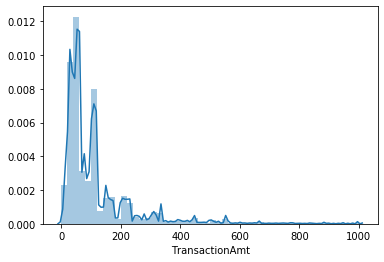

In [60]:
g = train_txn['TransactionAmt']
filtered = g[(g >= 0) & (g < 1000)]
sns.distplot(filtered, kde=True, hist=True, hist_kws={"range": [0,1000]})